# Figure 7

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

c_c = 'xkcd:bright sky blue'
c_p = 'xkcd:bright blue'
c_v = 'green'
c_h = 'yellowgreen'
c_e = 'black'

SMALLER_SIZE = 12
SMALL_SIZE = 16 # was 14
MEDIUM_SIZE = 18
BIG_SIZE = 26
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title
plt.rc('xtick.major', size=10)
plt.rc('xtick', direction="inout")
plt.rc('ytick.major', size=10)
plt.rc('ytick', direction="inout")
plt.rc('ytick.minor',size=5)

In [4]:
# Pick planet:
planet = "Earth"

# For plotting multiple runs at once, had to take steps of 100 years due to hardware limitations;
# this doesn't change the visuals of the plot at all due to the large sample size.
# This is different than the numerical analysis, where it was possible to go through the
# runs one-by-one and therefore used every point (i.e., step size = 1 year).
step = 100

# ==========================================================================================
#   PALLAS
# ==========================================================================================
time = []
L_pallas_e = []
M_pallas_e = []
H_pallas_e = []
max_pallas_e =[]

with open("".join(["../bin/phaeton_max_pallas/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines:
        time.append(float(line.split(None, 21)[0]))
        max_pallas_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_L_pallas/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: L_pallas_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_M_pallas/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: M_pallas_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_H_pallas/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: H_pallas_e.append(float(line.split(None,21)[2]))

# ==========================================================================================
#   HYGEIA
# ==========================================================================================
L_hygeia_e = []
M_hygeia_e = []
H_hygeia_e = []
max_hygeia_e =[]

with open("".join(["../bin/phaeton_max_hygeia/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: max_hygeia_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_L_hygeia/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: L_hygeia_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_M_hygeia/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: M_hygeia_e.append(float(line.split(None,21)[2]))

with open("".join(["../bin/phaeton_H_hygeia/data_in_mat/", planet]), 'r') as f:  
    lines =  f.read().splitlines()[1::step]  
    for line in lines: H_hygeia_e.append(float(line.split(None,21)[2]))

# ==========================================================================================
#   CONTROL
# ==========================================================================================
control_e = []

with open("".join(["../bin/control_2M/data_in_mat/", planet]), 'r') as f:
    lines =  f.read().splitlines()[1::step]
    for line in lines: control_e.append(float(line.split(None,21)[2]))

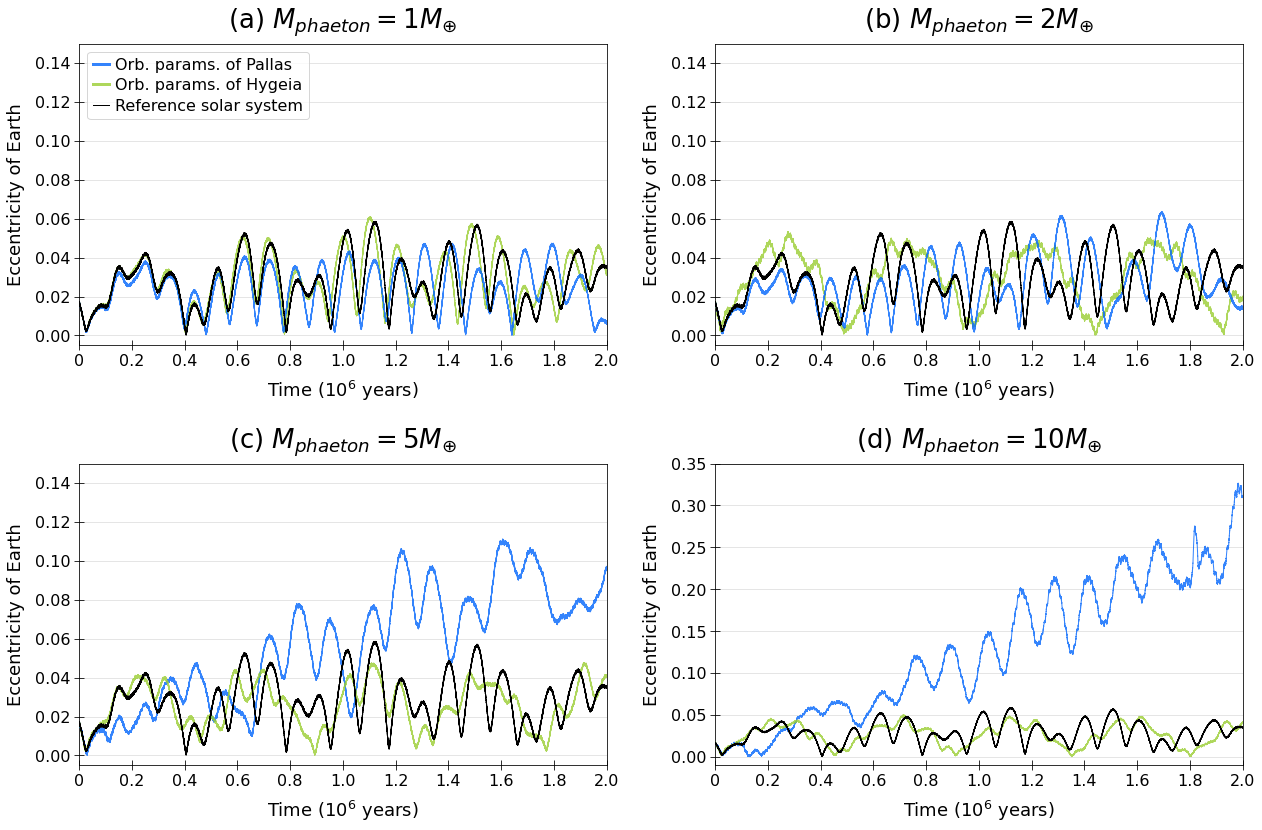

In [10]:
legend = []

def e_plot():
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), facecolor="white")
    alph = 0.8  # alpha for plots
    lw = 1.5    # default line width
    if planet == 'Earth': lw = 1
    lw_L = 3
  
    rcParams['axes.titlepad'] = 15
    rcParams['axes.labelpad'] = 10

    # PALLAS PLOT:
    if planet == "Venus" or planet == "Earth":
        axs[0,0].plot(time, (np.array(L_pallas_e)), color = c_p, alpha=alph, linewidth = lw, zorder=4)
        axs[0,0].plot(legend, legend, label = "Orb. params. of Pallas", alpha = alph, linewidth = lw_L, color = c_p, zorder = 3)
        axs[0,1].plot(time, (np.array(M_pallas_e)), color = c_p, alpha=alph, linewidth = lw, zorder=4)
        axs[0,1].plot(legend, legend, label = "Pallas", alpha = alph, linewidth = lw_L, color = c_p, zorder = 3)
        axs[1,0].plot(time, (np.array(H_pallas_e)), color = c_p, alpha=alph, linewidth = lw, zorder=4)
        axs[1,0].plot(legend, legend, label = "Pallas", alpha = alph, linewidth = lw_L, color = c_p, zorder = 3)
        axs[1,1].plot(time, (np.array(max_pallas_e)), color = c_p, alpha=alph, linewidth = lw, zorder=2)
        axs[1,1].plot(legend, legend, label = "Pallas", alpha = alph, linewidth = lw_L, color = c_p, zorder = 3)

    # HYGEIA PLOT:
    if planet == "Earth" or planet == "Mars" or planet == "Venus":
        axs[0,0].plot(time, np.array(L_hygeia_e), color = c_h, alpha=alph, linewidth = lw, zorder=2)
        axs[0,0].plot(legend, legend, label = "Orb. params. of Hygeia", alpha = alph, linewidth = lw_L, color = c_h, zorder = 3)
        axs[0,1].plot(time, np.array(M_hygeia_e), color = c_h, alpha=alph, linewidth = lw, zorder=3)
        axs[0,1].plot(legend, legend, label = "Hygeia", alpha = alph, linewidth = lw_L, color = c_h, zorder = 3)
        axs[1,0].plot(time, np.array(H_hygeia_e), color = c_h, alpha=alph, linewidth = lw, zorder=5)
        axs[1,0].plot(legend, legend, label = "Hygeia", alpha = alph, linewidth = lw_L, color = c_h, zorder = 3)
        axs[1,1].plot(time, np.array(max_hygeia_e), color = c_h, alpha=alph, linewidth = lw, zorder=4)
        axs[1,1].plot(legend, legend, label = "Hygeia", alpha = alph, linewidth = lw_L, color = c_h, zorder = 3)
   
    axs[0,0].set_title("(a) $M_{phaeton} = 1M_⊕$")
    axs[0,1].set_title("(b) $M_{phaeton} = 2M_⊕$")
    axs[1,0].set_title("(c) $M_{phaeton} = 5M_⊕$")
    axs[1,1].set_title("(d) $M_{phaeton} = 10M_⊕$")

    for ax in axs.flat:
        ax.set(xlabel="".join(["Time (", r'10$^{6}$', " years)"]), ylabel='Eccentricity of ' + planet)
        ax.set_xlim(0,2000000)
        if planet == "Mars":
            ax.set_ylim(0.0,0.25)
            axs[1,0].set_ylim(0.0,0.5)
            axs[1,1].set_ylim(0.0,0.7)
        elif planet == "Venus":
            ax.set_ylim(-0.01,0.15)
            axs[1,1].set_ylim(-0.01,0.45)
        elif planet == "Earth":
            ax.set_ylim(-0.005, 0.15)
            axs[1,1].set_ylim(-0.01,0.35)
        ax.grid(zorder=0, axis="y", which="both", alpha=0.4)
        ax.plot(time, (np.array(control_e)), color = c_e, alpha=1, label="Reference solar system", linewidth = lw, zorder=100)
        ax.set_xticks([0,0.2e6,0.4e6,0.6e6,0.8e6,1e6,1.2e6,1.4e6,1.6e6,1.8e6,2e6], labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    
    axs[0,0].legend(loc="upper left", handlelength=1, handletextpad=0.4, labelspacing=0.35, borderpad=0.35)

    fig.tight_layout(pad=2.4)
    fig.savefig('fig_7.png', dpi=300, bbox_inches="tight")
    plt.show()


e_plot()